In [ ]:
import numpy as np
import pandas as pd

In [ ]:
ds = pd.read_csv("/content/spam (2).csv", encoding="latin-1")

In [ ]:
ds.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### here we can observe that the columns 3,4,5 are almost empty so we do not need them hence we will drop them

In [ ]:
ds = ds.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [ ]:
ds.columns

Index(['v1', 'v2'], dtype='object')

** For spam classification our target column is the first column named v1 we need to encode the values since they are categorical for that we will use label encoder **

#  Encoding values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
ds['v1'] = le.fit_transform(ds['v1'])

In [ ]:
ds.v1.value_counts()

v1
0    4825
1     747
Name: count, dtype: int64

#  Checking for duplicates

In [ ]:
ds.duplicated().sum()

403

In [ ]:
ds =ds.drop_duplicates()

In [ ]:
ds.shape

(5169, 2)

In [ ]:
ham = ds[ds['v1']==0].sample(653)

In [ ]:
ham.head()

,v1,v2
2682,0,I got a call from a landline number. . . I am ...
5332,0,I think steyn surely get one wicket:)
3327,0,No we put party 7 days a week and study lightl...
2459,0,Nope. Meanwhile she talk say make i greet you.
4659,0,You call him and tell now infront of them. Cal...


In [ ]:
spam = ds[ds['v1']==1]

In [ ]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 2 to 5567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      653 non-null    int64 
 1   v2      653 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.3+ KB


In [ ]:
ds2 = pd.concat([ham,spam],axis=0)

In [ ]:
ds2.head()

,v1,v2
2682,0,I got a call from a landline number. . . I am ...
5332,0,I think steyn surely get one wicket:)
3327,0,No we put party 7 days a week and study lightl...
2459,0,Nope. Meanwhile she talk say make i greet you.
4659,0,You call him and tell now infront of them. Cal...


In [ ]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 2682 to 5567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      1306 non-null   int64 
 1   v2      1306 non-null   object
dtypes: int64(1), object(1)
memory usage: 30.6+ KB


In [ ]:
ds2.duplicated().sum(), ds2.isnull().sum()

(0,
 v1    0
 v2    0
 dtype: int64)

## visualization

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## seperating data into ham and spam

In [ ]:
hamt = ds2[ds2['v1']==1]
spamt = ds2[ds2['v1']==0]

In [ ]:
hamt.head()

,v1,v2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."


In [ ]:
ham_txt = " ".join(hamt['v2'])
len(ham_txt)

90695

# **Word cloud for ham sms**

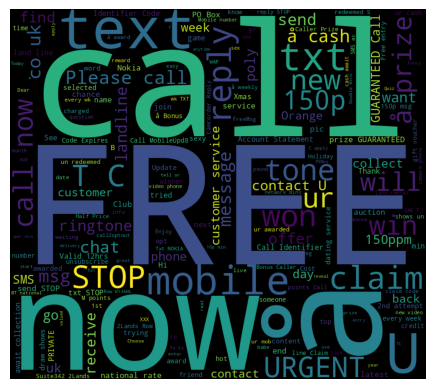

In [ ]:
wc = WordCloud(width=900,height=800).generate(ham_txt)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
spamt.head()

,v1,v2
2682,0,I got a call from a landline number. . . I am ...
5332,0,I think steyn surely get one wicket:)
3327,0,No we put party 7 days a week and study lightl...
2459,0,Nope. Meanwhile she talk say make i greet you.
4659,0,You call him and tell now infront of them. Cal...


In [ ]:
spam_txt = " ".join(spamt['v2'])
len(spam_txt)

46749

## word cloud for spam **sms**

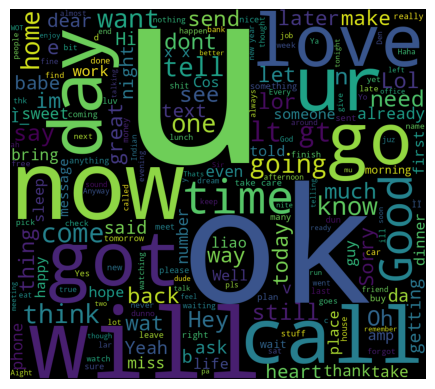

In [ ]:
wc1 = WordCloud(width = 900,height = 800).generate(spam_txt)
plt.imshow(wc1)
plt.axis('off')
plt.show()

# model creation

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(ds2['v2'],ds2['v1'],test_size=0.2,random_state=42,stratify=ds2['v1'])

In [ ]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((1044,), (1044,), (262,), (262,))

In [ ]:


import spacy

nlp = spacy.load("en_core_web_sm")

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

## nlp pipeline

### this pipeline will do test preprocessing that includes tokenization,vectorization,lemmatization,stop word removal , vocabulary creation and model generation

In [ ]:
model = Pipeline([
    ('text preprocessing',TfidfVectorizer(
    tokenizer = lambda txt:[token.lemma_ for token in nlp(txt)],
    stop_words = 'english',
    ngram_range = (1,2),
    max_features = 500)),
    ('text classifier',RandomForestClassifier())
])


In [ ]:
model.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['I', 'far', 'make', 'whereaft'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('text preprocessing',
                 TfidfVectorizer(max_features=500, ngram_range=(1, 2),
                                 stop_words='english',
                                 tokenizer=<function <lambda> at 0x7878c3e030a0>)),
                ('text classifier', RandomForestClassifier())])

# model prediction

In [ ]:
ypred = model.predict(xtest)

ypred[:5]

array([0, 1, 1, 0, 0])

## classification report

In [ ]:
from sklearn.metrics import classification_report as cr
print(cr(ytest,ypred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       131
           1       0.96      0.92      0.94       131

    accuracy                           0.94       262
   macro avg       0.94      0.94      0.94       262
weighted avg       0.94      0.94      0.94       262



# testing

### here we are checking our model through a sample input

In [ ]:
sample_txt = 'hurray !! you won a 25 million dollors'

### this sample sms is a spam message as we can see , so it should be classified as 1 by our model , let's see what happens

In [ ]:
model = Pipeline([
    ('text preprocessing',TfidfVectorizer(
    tokenizer = lambda txt:[token.lemma_ for token in nlp(sample_txt)],
    stop_words = 'english',
    ngram_range = (1,2),
    max_features = 500)),
    ('text classifier',RandomForestClassifier())
])

In [ ]:
model.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['!', '25', 'dollor', 'hurray', 'million', 'win'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('text preprocessing',
                 TfidfVectorizer(max_features=500, ngram_range=(1, 2),
                                 stop_words='english',
                                 tokenizer=<function <lambda> at 0x7878c39aadd0>)),
                ('text classifier', RandomForestClassifier())])

In [ ]:
ypred = model.predict([sample_txt])

In [ ]:
print(ypred[0])

1


##** As we can see it has correctly classified the sample text as spam i.e. prediction = 1 so the model is working good**